# Digital Image Processing

## Assignment 0

### Vedansh Agrawal
### 2021112010

### Quetion 1:

Our task is to quantize the given image from src_img file into n bits where n varies from 1-8

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def quantize(image, bits):
    level = 2 ** (8-bits)
    quantized_image = ((image // level)) * level

    return quantized_image

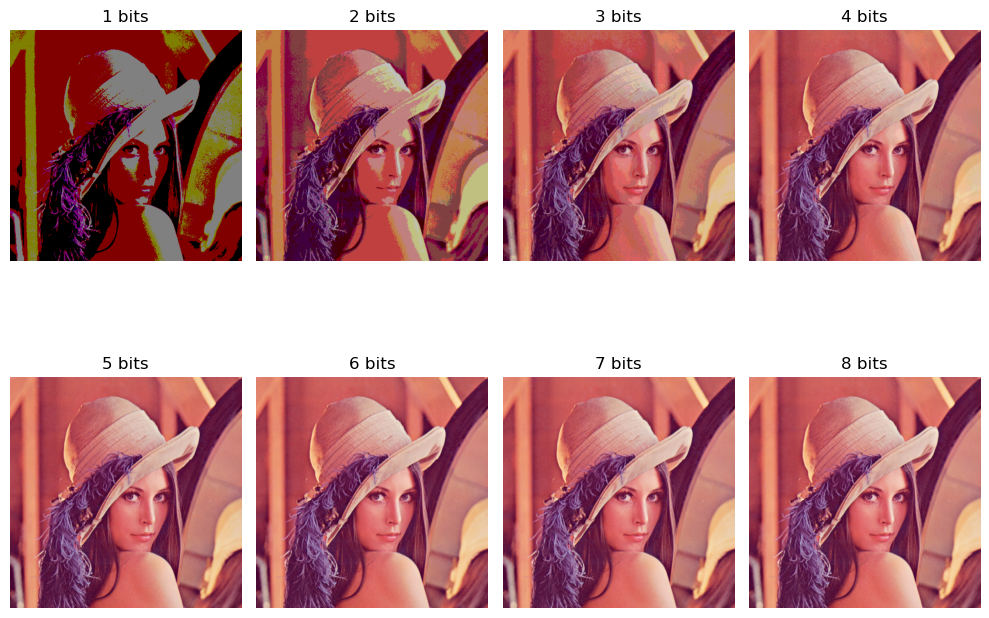

In [3]:
lenna = cv2.imread('src_img/Lenna.png')
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(2, 4, figsize=(10, 8))

for bits in range(1, 9):
    quantized_lenna = quantize(lenna, bits)
    cv2.imwrite(f'out_img/Q1/{bits}_quantized.jpg', cv2.cvtColor(quantized_lenna, cv2.COLOR_RGB2BGR))
    axs[(bits-1)//4, (bits-1)%4].imshow(quantized_lenna)
    axs[(bits-1)//4, (bits-1)%4].set_title(f'{bits} bits')
    axs[(bits-1)//4, (bits-1)%4].axis('off')


plt.tight_layout()
plt.show()

As we can see the effect of quantizing restricts the vast gradient/shades of colours which can be used. When quantizing it to one bit, we can only choose between 2 shades of red, blue and green which gives the image output as above. As we increase the number of bits the image seems to become more like the original image. After 4 bits, there is very negligilble difference. So to reduce the size of the image while also preserving the image quality itself, the lowest bit she can quantize to is 4 bits. 

### Question 2:

1. First we will make the histequalise function.

In [4]:
def histequalise(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0,256])

    cdf = histogram.cumsum()
    cdf_equalized = np.round((cdf - cdf.min()) * (255) / (cdf.max() - cdf.min())).astype(int)
    
    equalized_image = cdf_equalized[image]
    equalized_hist, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0,256])
    return equalized_image, equalized_hist, histogram

2. Now for the given image image.jpeg and an image of my choice, we will equalise the histograms.

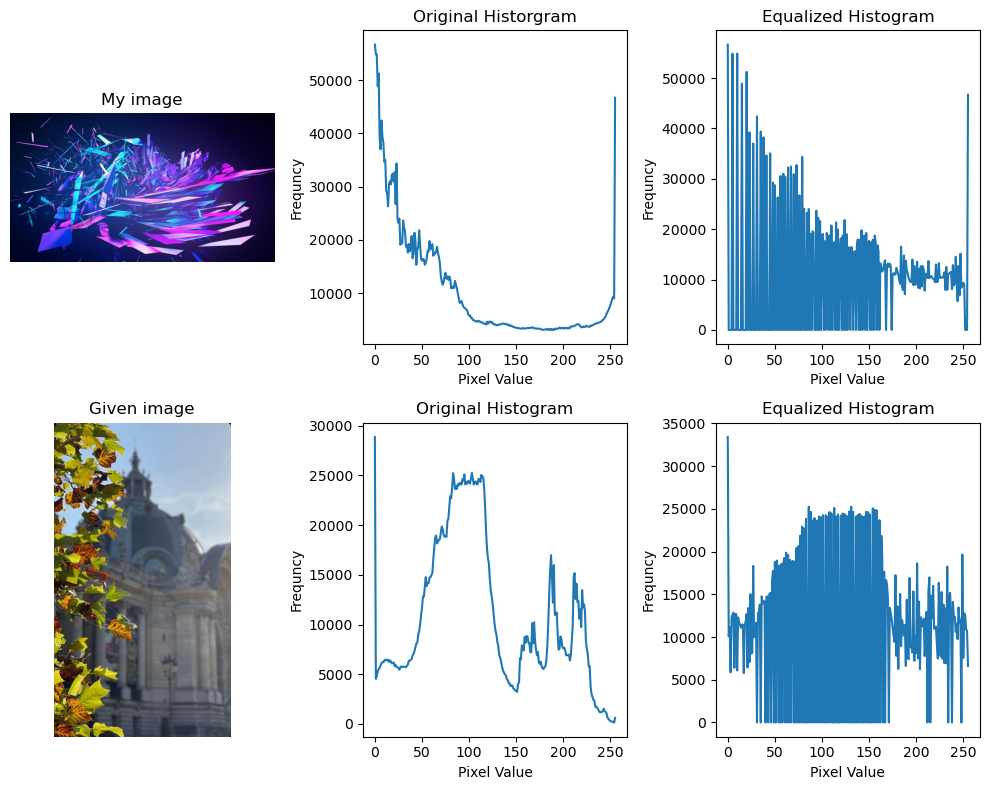

In [5]:
A = cv2.imread('src_img/image2.jpg')
B = cv2.imread('src_img/image.jpg')
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(B, cv2.COLOR_BGR2RGB)

equalized_A, equalized_hist_A, hist_A = histequalise(A)
equalized_B, equalized_hist_B, hist_B = histequalise(B)

fig, axs = plt.subplots(2, 3, figsize=(10, 8))

axs[0, 0].imshow(A)
axs[0, 0].set_title('My image')
axs[0, 0].axis('off')

axs[1, 0].imshow(B)
axs[1, 0].set_title('Given image')
axs[1, 0].axis('off')

axs[0, 1].plot(hist_A)
axs[0, 1].set_title('Original Historgram')
axs[0, 1].set_xlabel('Pixel Value')
axs[0, 1].set_ylabel('Frequncy')

axs[0, 2].plot(equalized_hist_A)
axs[0, 2].set_title('Equalized Histogram')
axs[0, 2].set_xlabel('Pixel Value')
axs[0, 2].set_ylabel('Frequncy')

axs[1, 1].plot(hist_B)
axs[1, 1].set_title('Original Histogram')
axs[1, 1].set_xlabel('Pixel Value')
axs[1, 1].set_ylabel('Frequncy')

axs[1, 2].plot(equalized_hist_B)
axs[1, 2].set_title('Equalized Histogram')
axs[1, 2].set_xlabel('Pixel Value')
axs[1, 2].set_ylabel('Frequncy')

plt.tight_layout()
plt.show()

This is however not a good representation of a coloured image. With the computed histogram, we only have the information of how many pixels of a certain intensity are present but we are not aware of whether the intenstity is from red, green or blue wavelengths. Converting this histogram back into an image would only give us a grayscale image in return. It is better to perform the equilization process with the individual RGB channels itself.

3. Now let us observe the histograms of the seperate channels for both images A and B.

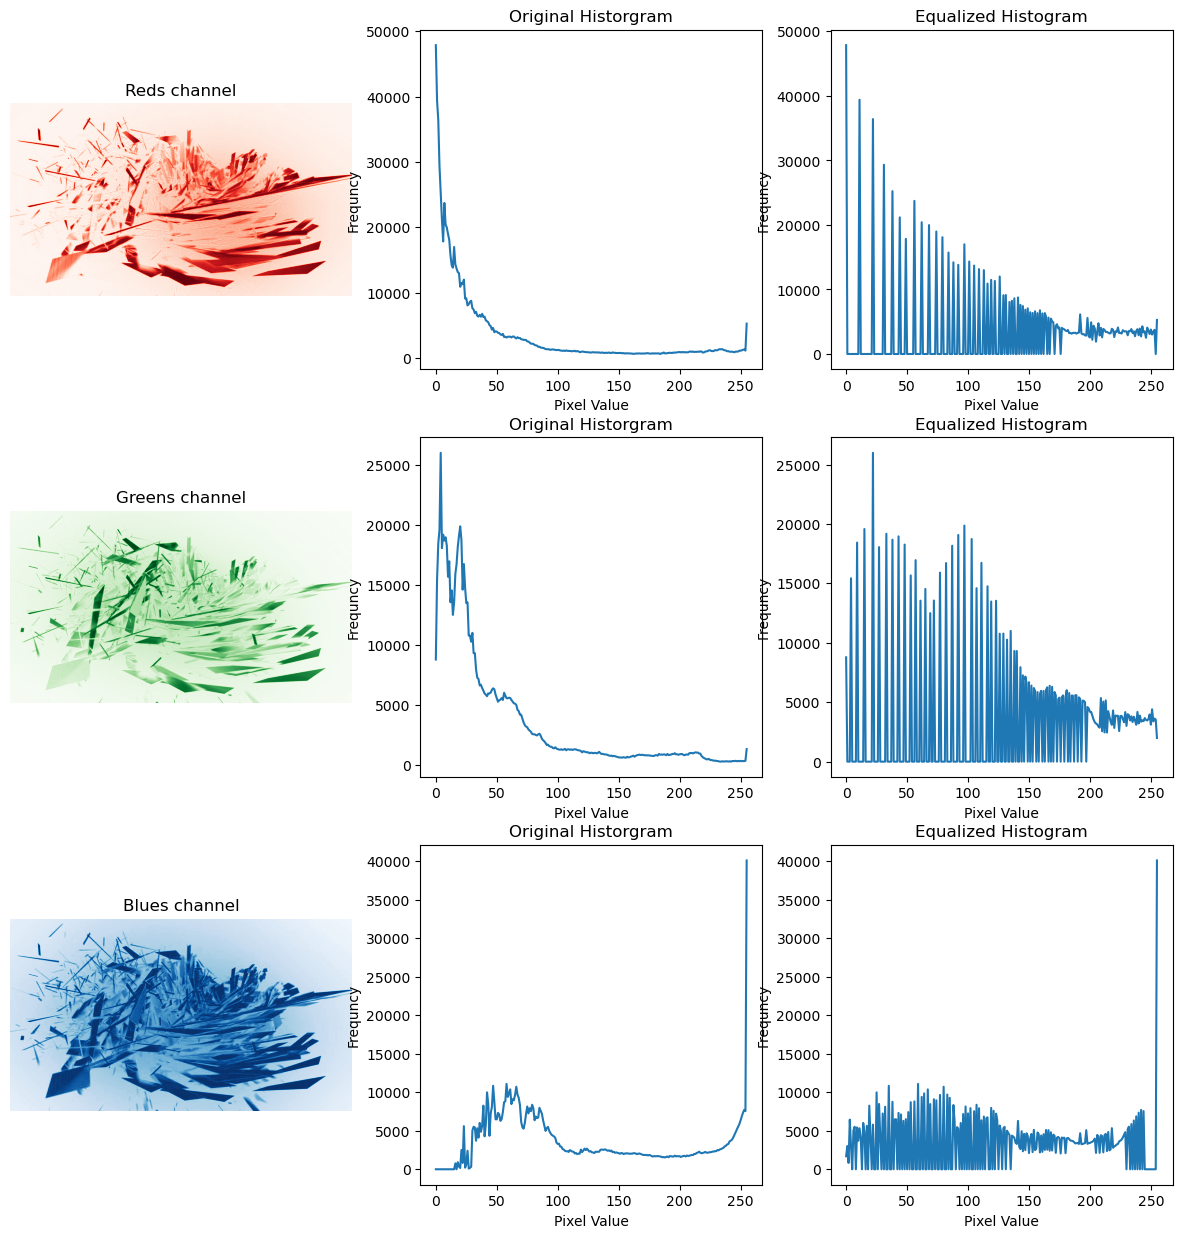

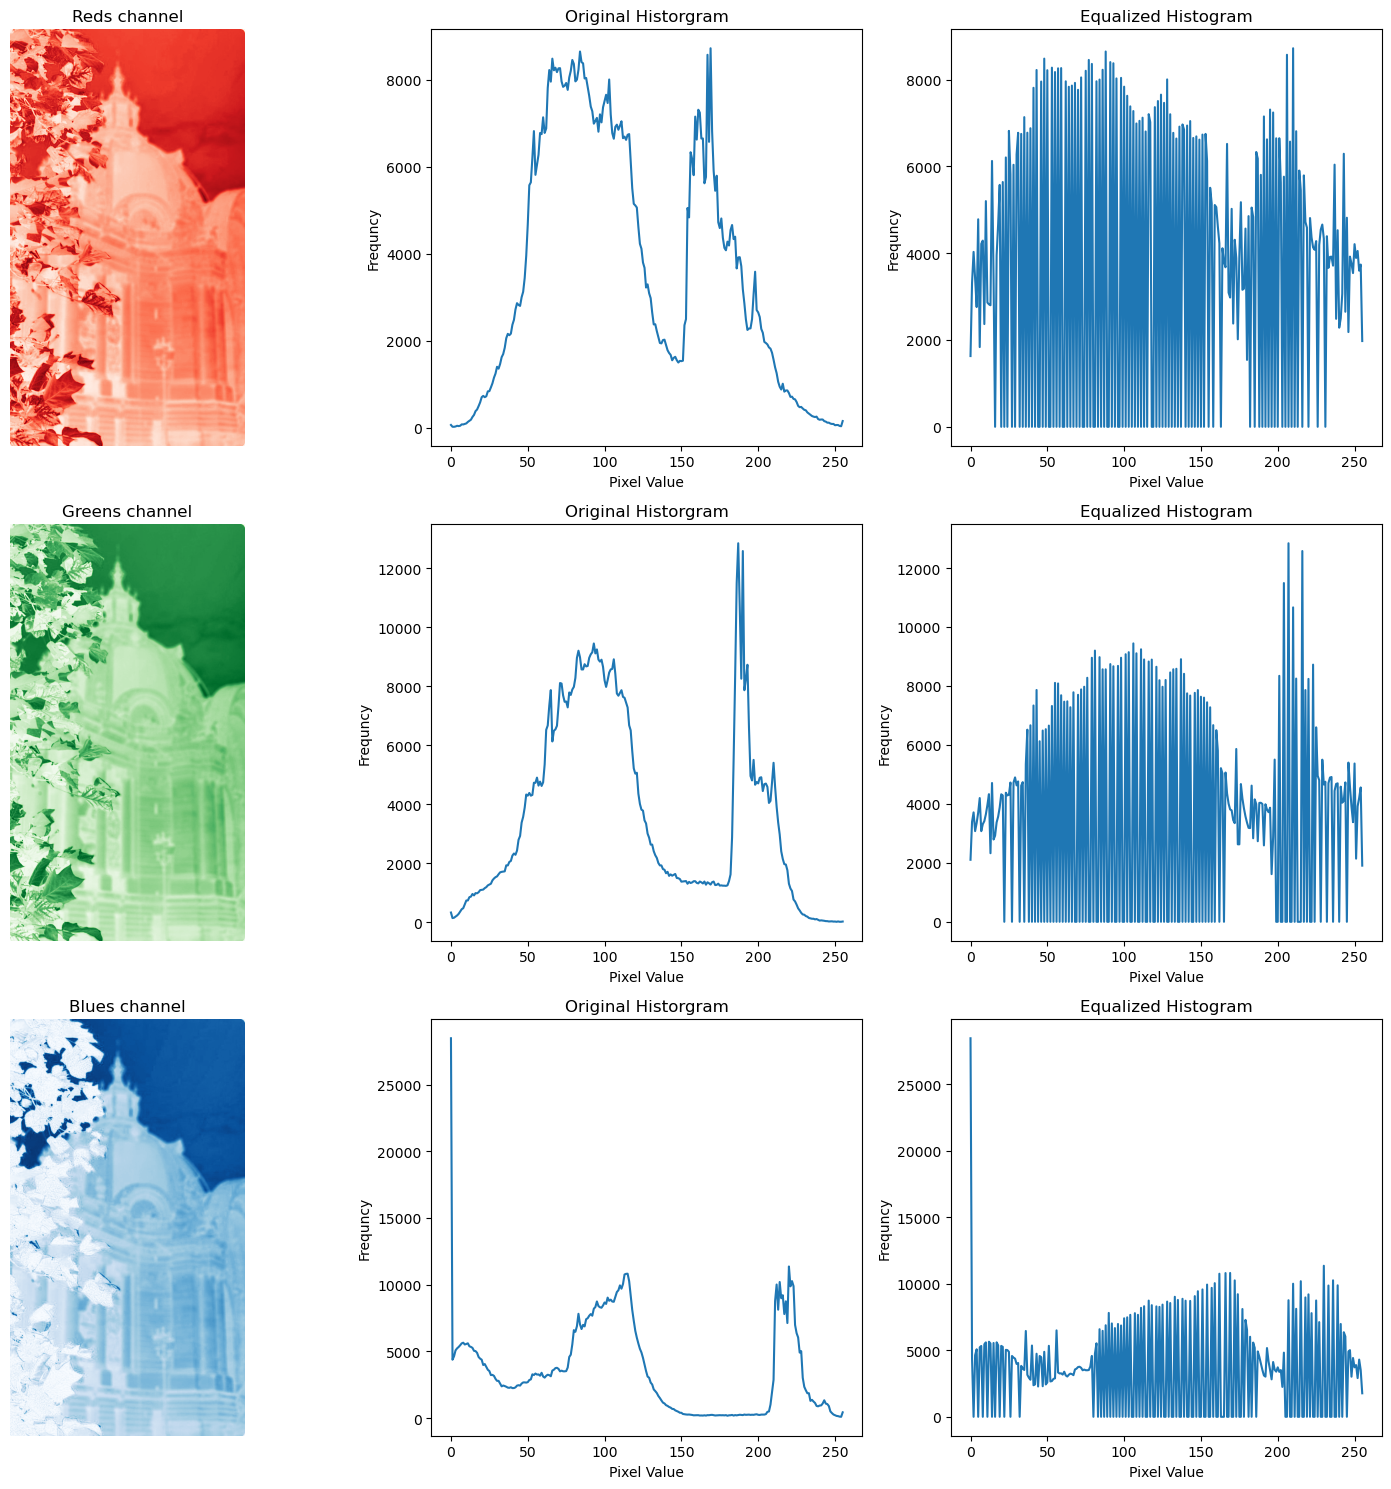

In [6]:
Finalequalized = []
Final_hist_equalized = []
colours = ['Reds', 'Greens', 'Blues']

for image in [A, B]:
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    Finalequalized.append([])
    Final_hist_equalized.append([])
    for i in range(3):
        chanel = image[:, :, i]

        axs[i, 0].imshow(chanel, cmap=f'{colours[i]}')
        axs[i, 0].set_title(f'{colours[i]} channel')
        axs[i, 0].axis('off')

        equalized, equalized_hist, hist = histequalise(chanel)  
        Finalequalized[-1].append(equalized)
        Final_hist_equalized[-1].append(equalized_hist)
        
        axs[i, 1].plot(hist)
        axs[i, 1].set_title('Original Historgram')
        axs[i, 1].set_xlabel('Pixel Value')
        axs[i, 1].set_ylabel('Frequncy')

        axs[i, 2].plot(equalized_hist)
        axs[i, 2].set_title('Equalized Histogram')
        axs[i, 2].set_xlabel('Pixel Value')
        axs[i, 2].set_ylabel('Frequncy')

plt.tight_layout()
plt.show()

4. Now let us observe the final equalized channels for both the images.

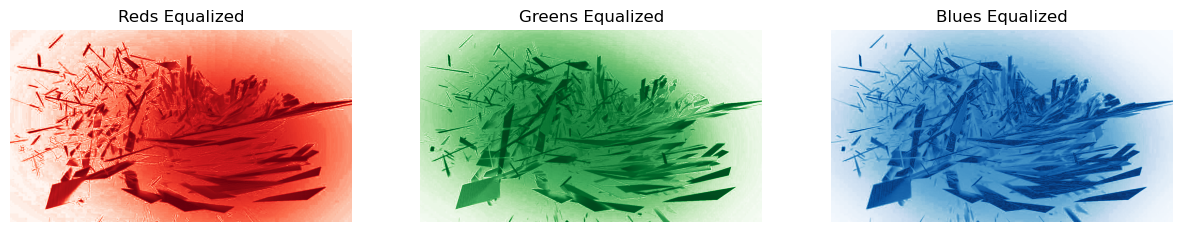

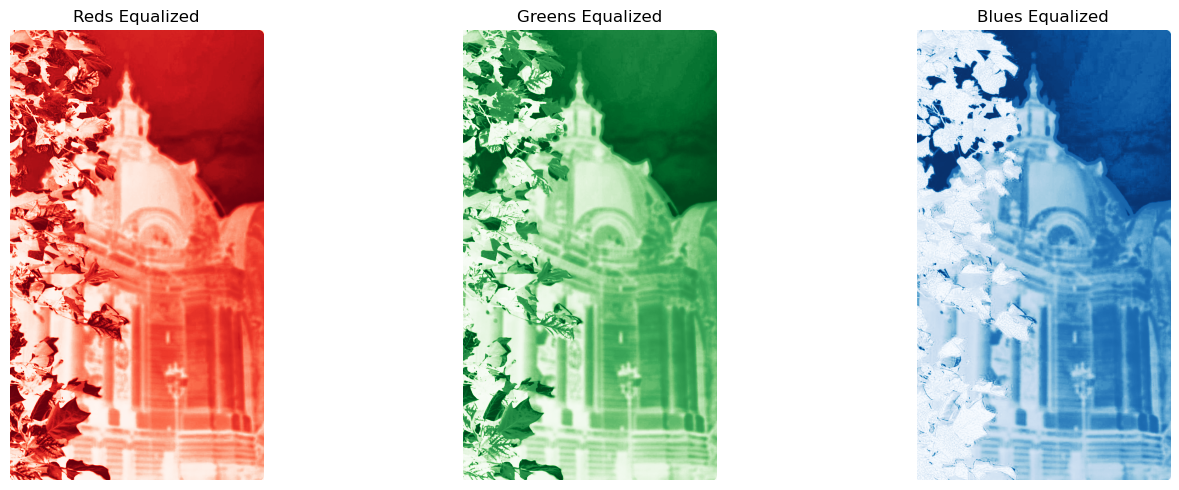

In [7]:
for  images in Finalequalized:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, image in enumerate(images):
        axs[i].imshow(image, cmap=f'{colours[i]}')
        axs[i].set_title(f'{colours[i]} Equalized')
        axs[i].axis('off')
plt.tight_layout()
plt.show()

5. Now let us merge the 3 equalized channels of both images A and B and plot the histograms and the image simulatneously.

(720, 1280, 3)
(1280, 721, 3)


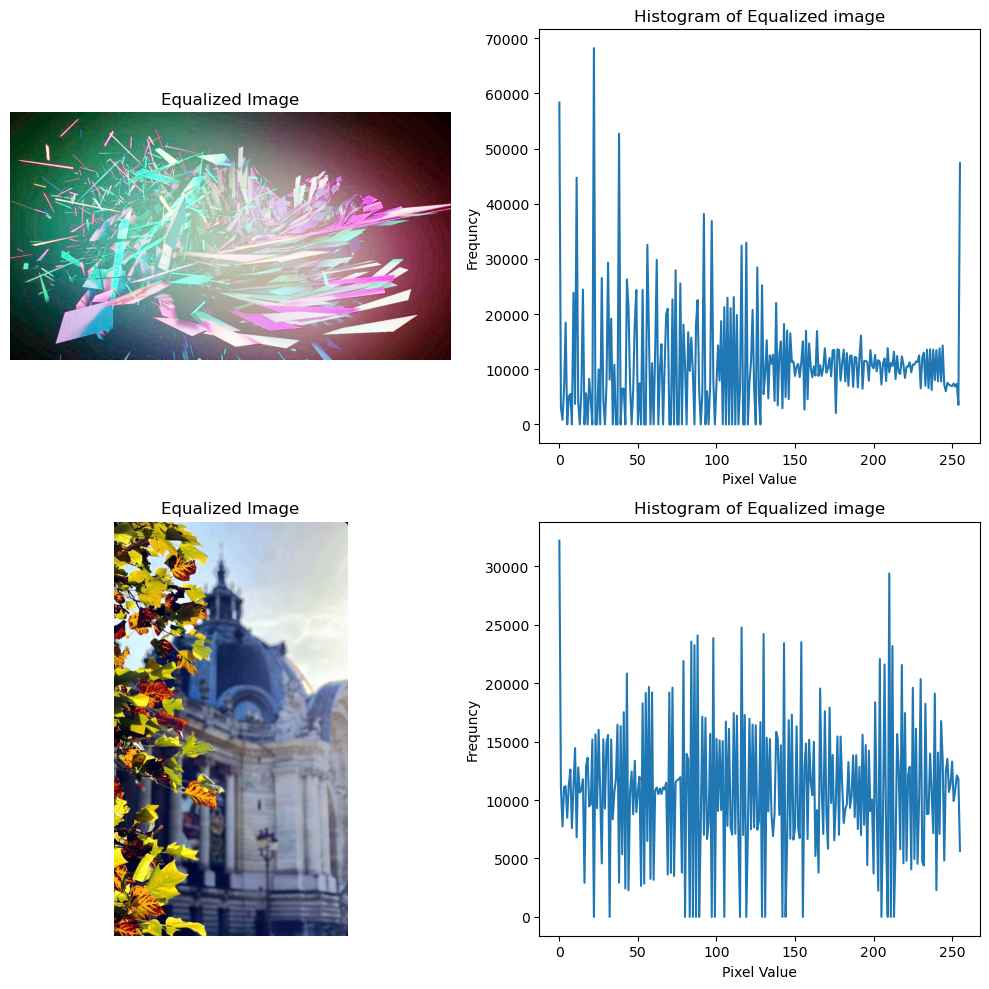

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
Final_hist = []
for i, images in enumerate(Finalequalized):
    Final_image = np.stack((images[0], images[1], images[2]), axis=-1)
    print(Final_image.shape)

    axs[i, 0].imshow(Final_image)
    axs[i, 0].set_title('Equalized Image')
    axs[i, 0].axis('off')

    final_hist, _ = np.histogram(Final_image.flatten(), bins = 256, range=[0, 256])
    Final_hist.append(final_hist)
    
    axs[i, 1].plot(final_hist)
    axs[i, 1].set_title('Histogram of Equalized image')
    axs[i, 1].set_xlabel('Pixel Value')
    axs[i, 1].set_ylabel('Frequncy')

plt.tight_layout()
plt.show()

6. Now let us concatenate the equalized histograms of the individual channels of both images and compare thrm to the histogram of the final images.

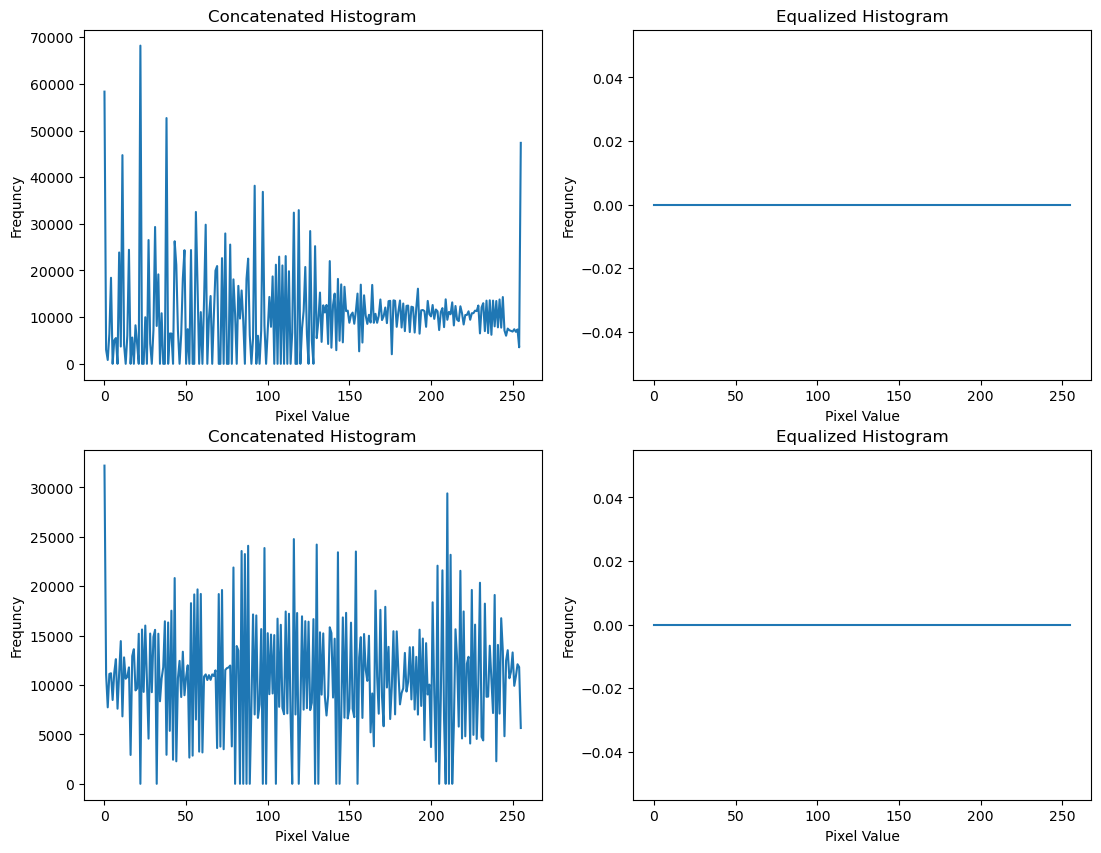

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(13, 10))

for i in range(len(Final_hist)):
    concate_histogram = Final_hist_equalized[i][0] + Final_hist_equalized[i][1] + Final_hist_equalized[i][2]

    axs[i, 0].plot(concate_histogram)
    axs[i, 0].set_title('Concatenated Histogram')
    axs[i, 0].set_xlabel('Pixel Value')
    axs[i, 0].set_ylabel('Frequncy')

    axs[i, 1].plot(Final_hist[i] - concate_histogram)
    axs[i, 1].set_title('Equalized Histogram')
    axs[i, 1].set_xlabel('Pixel Value')
    axs[i, 1].set_ylabel('Frequncy')

7. In this assignment, I learned to equalize the histogram of an image and obtain a enhanced contrast image. I even learnt the fact that equilazation of the histogram of the original image does not give a good representation of the image, so we resolve to equalizing the individual channels.

### Quetion 3:

1. Here, we are given the image 0_mod.png and we are required to extract the LSB plane from the image. We can obtain this by using the bitwise and operator of the given image with an image of ones.

(1280, 1672, 3)


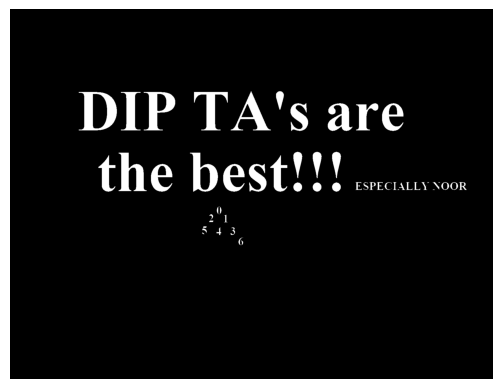

In [10]:
crypted_image = cv2.imread('src_img/6_mod.png')
decrypted_image = (crypted_image & 1)*255

plt.imshow(decrypted_image)
plt.axis('off')
print(decrypted_image.shape)

2. We can see that the message which is encrypted says that the DIP TA's are the best, especially noor.

3. We can observe the cryptic image to be disproportioned. This was because inorder to embed the message image into the given image, we need to make sure that the shapes of the images are the same. This makes us stretch the base image such that it fits the message image perfectly and we can encrypt the image. The shape of the message image is 1672x1280, so all the images in src_img have to be resized to match this.

4. To create the crptic image, the first thing is to do is take a message image, and quantize it so that we obtain a single bit at every pixel of the image, and then we take the image into which we want to encrypt it into. We first completely convert the lSB plane into 0s, and then add the message image as the new LSB plane in our image which results into the encrypted image. 

5. Now let us make the encrypt function to encrypt our own function.

In [83]:
def crypt(message_image, base_image):
    message_image = message_image//64
    base_image = base_image & (255)<<3 # Removing the LSB by and operation with 11111110
    encrypted_image = base_image | (message_image) # Adding the message image as the new LSB

    return encrypted_image

Text(0.5, 1.0, 'Crypted Image')

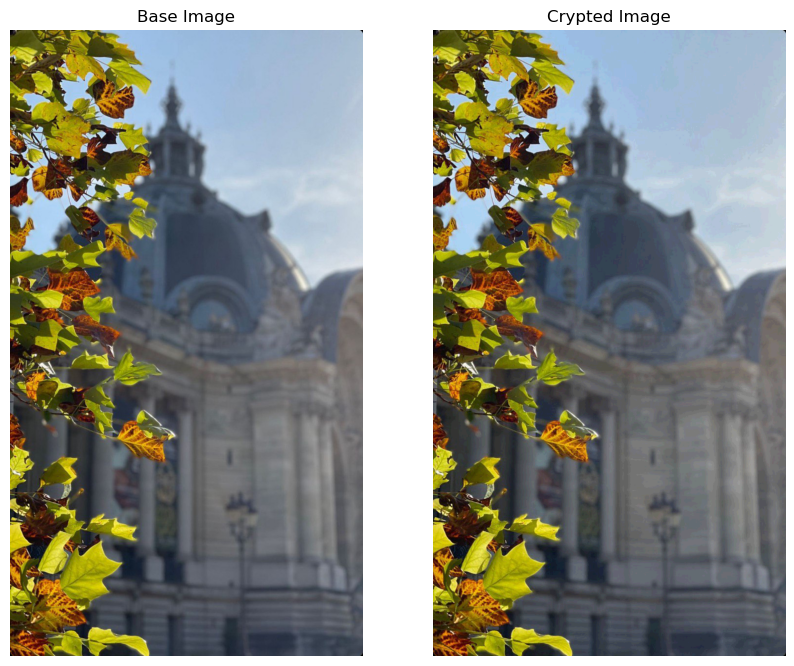

In [84]:
base_image = cv2.imread('src_img/image.jpg')[:, :-1, :]
message_image = cv2.imread('src_img/message.jpg')
base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
message_image = cv2.cvtColor(message_image, cv2.COLOR_BGR2RGB)

crypted_image = crypt(message_image, base_image)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(base_image)
axs[0].axis('off')
axs[0].set_title('Base Image')

axs[1].imshow(crypted_image)
axs[1].axis('off')
axs[1].set_title('Crypted Image')

As we can see, there is no difference, between the 2 images despite the fact that we have hidden a message image in the base image.

6. Now let us make a function which decrypts the encrypted image from the previous part.

In [87]:
def decrypt(encrypted_image):
    return (encrypted_image & (2**3)-1)*64


Text(0.5, 1.0, 'Message')

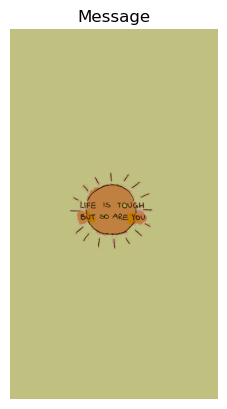

In [88]:
decrypted = decrypt(crypted_image)
plt.imshow(decrypted)
plt.axis('off')
plt.title('Message')

Doing it for the reverse image let us see what we obtain.

Text(0.5, 1.0, 'Crypted Image')

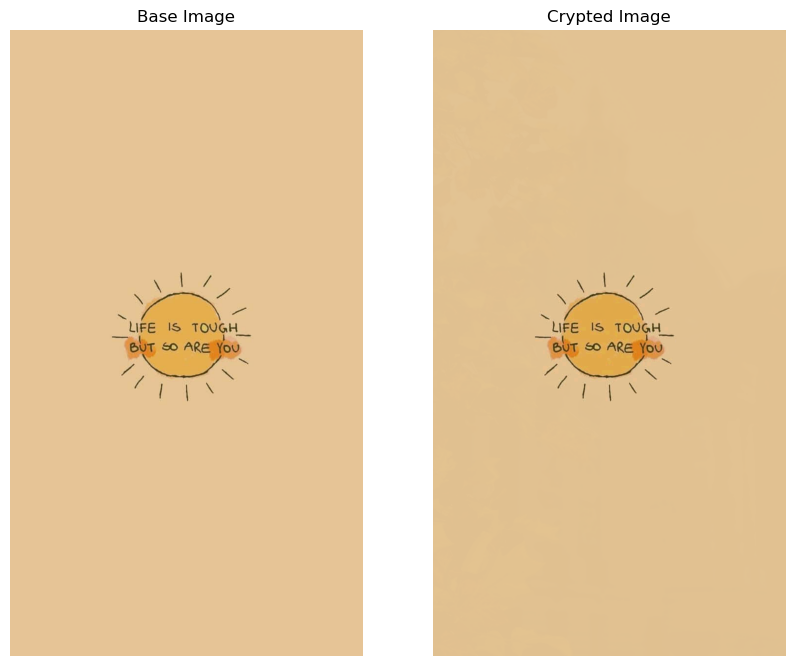

In [89]:
base_image = cv2.imread('src_img/message.jpg')
message_image = cv2.imread('src_img/image.jpg')[:, :-1, :]
base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
message_image = cv2.cvtColor(message_image, cv2.COLOR_BGR2RGB)

crypted_image = crypt(message_image, base_image)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(base_image)
axs[0].axis('off')
axs[0].set_title('Base Image')

axs[1].imshow(crypted_image)
axs[1].axis('off')
axs[1].set_title('Crypted Image')

Text(0.5, 1.0, 'Message')

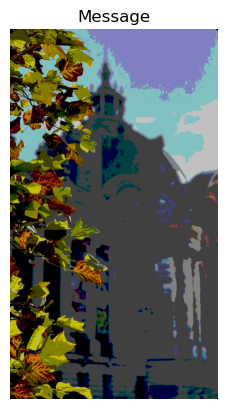

In [90]:
decrypted = decrypt(crypted_image)
plt.imshow(decrypted)
plt.axis('off')
plt.title('Message')

### Quetion 4:

1. For the same images A and B, we need to apply a linear piece wise function, as given below.

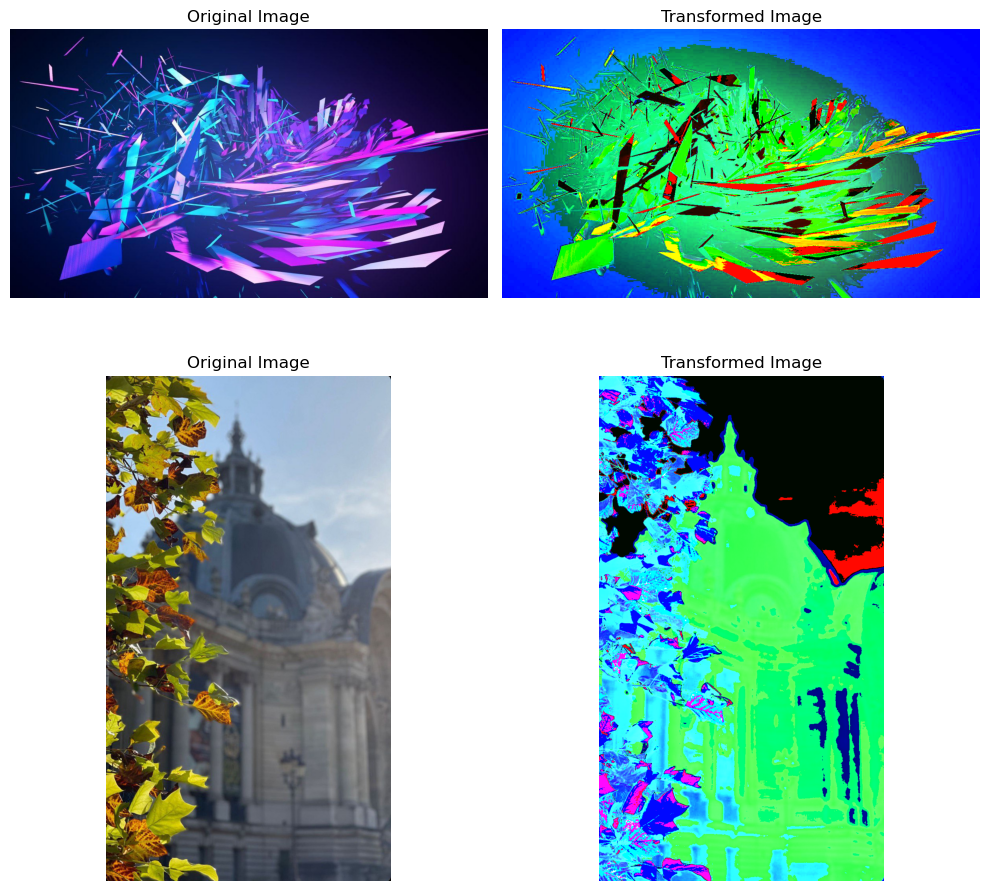

In [24]:
transformed_A = np.empty_like(A, dtype=np.int32)
transformed_B = np.empty_like(B, dtype=np.int32)
breakpoints = [[-1, 100, 200, 255], [-1, 128, 255], [-1, 75, 200, 255]]
slopes = [[1, 0, 0], [5, 0], [0, 1, 0]]
intercept = [[0, 0, 255], [1, 8], [255, 0, 0]]

for i in range(3):
    for j in range(len(breakpoints[i])-1):
        mask = (A[:, :, i] > breakpoints[i][j]) & (A[:, :, i] <= breakpoints[i][j+1])
        transformed_A[:, :, i][mask] = (slopes[i][j]*A[:, :, i][mask].astype(np.int32) + intercept[i][j])

    transformed_A = np.clip(transformed_A, 0, 255)

for i in range(3):
    for j in range(len(breakpoints[i])-1):
        mask = (B[:, :, i] > breakpoints[i][j]) & (B[:, :, i] <= breakpoints[i][j+1])
        transformed_B[:, :, i][mask] = (slopes[i][j]*B[:, :, i][mask].astype(np.int32) + intercept[i][j])

    transformed_B = np.clip(transformed_B, 0, 255)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(A)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(transformed_A)
axs[0, 1].set_title('Transformed Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(B)
axs[1, 0].set_title('Original Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(transformed_B)
axs[1, 1].set_title('Transformed Image')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

2. Now let us plot the transformations of the individual channels along with the line of best fit. The equations of the best fit line are given in the legend

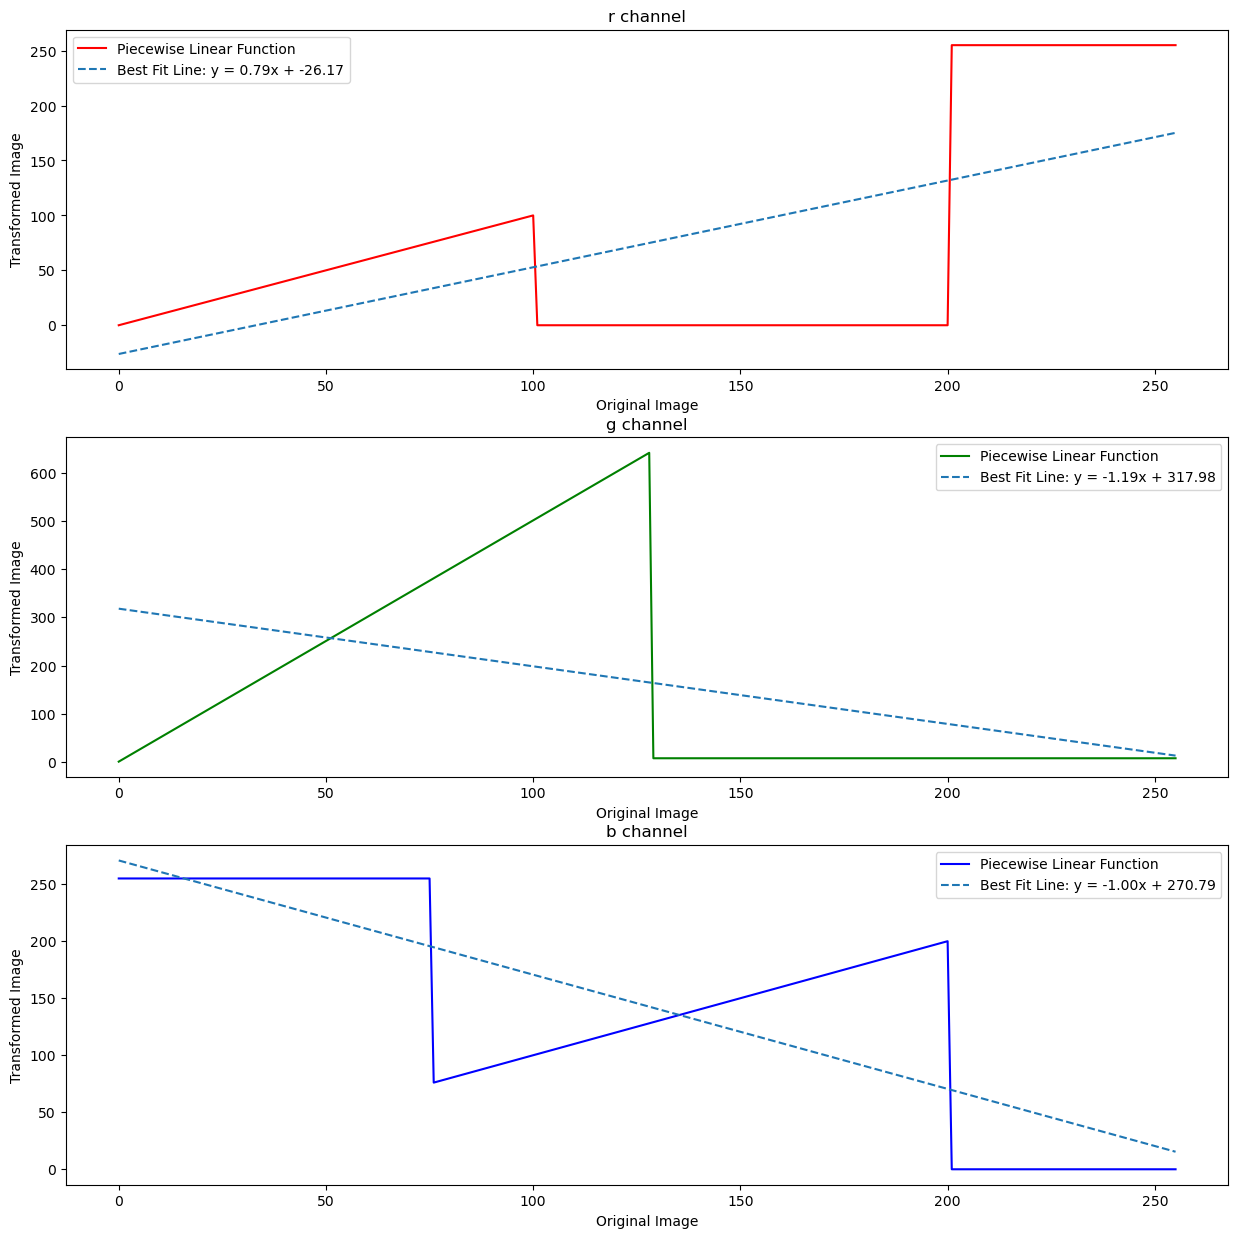

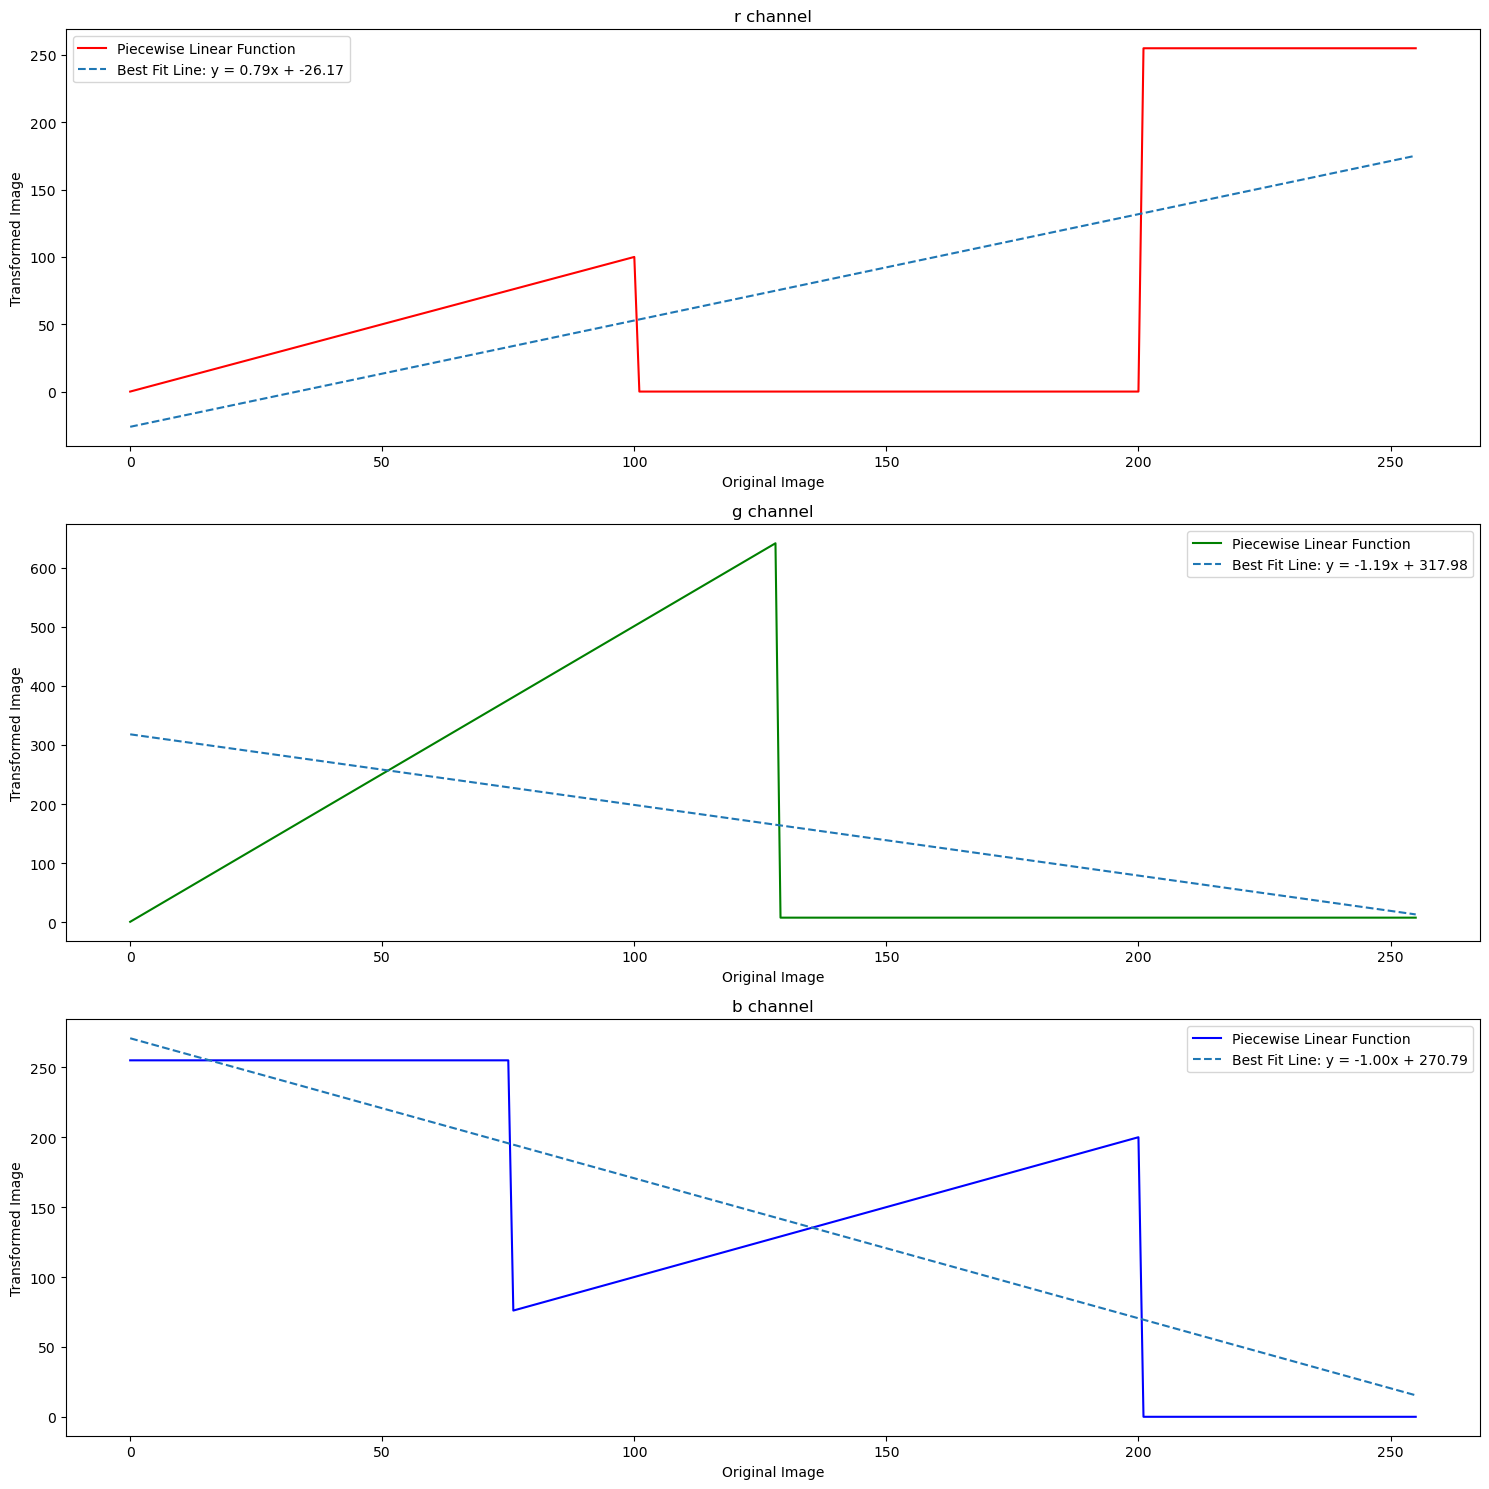

In [32]:
X_values = np.arange(256) 
colours = ['r', 'g', 'b']
bestfit_lines = []
piece_wise = []

for _ in range(2):
    fig, axs = plt.subplots(3, 1, figsize=(15, 15))
    for i in range(3):
        y_values = np.empty_like(X_values)
        for j in range(len(breakpoints[i]) - 1):
            mask = (X_values > breakpoints[i][j]) & (X_values <= breakpoints[i][j+1])
            y_values[mask] = slopes[i][j]*X_values[mask] + intercept[i][j]
        piece_wise.append(y_values)

        x_mean = np.mean(X_values)
        y_mean = np.mean(y_values)

        numerator = np.sum((X_values - x_mean) * (y_values - y_mean))
        denominator = np.sum((X_values - x_mean) ** 2)

        slope = numerator / denominator
        inter = y_mean - slope * x_mean

        y_pred = slope * X_values + inter
        bestfit_lines.append(y_pred)

        axs[i].plot(X_values, y_values, color=f'{colours[i]}', label='Piecewise Linear Function')
        axs[i].plot(X_values, y_pred, linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {inter:.2f}')
        axs[i].set_title(f'{colours[i]} channel')
        axs[i].set_xlabel('Original Image')
        axs[i].set_ylabel('Transformed Image')
        axs[i].legend()

plt.tight_layout()
plt.show()

3. Now let us plot the input output intensities of both A and B and find their lines of best fit.

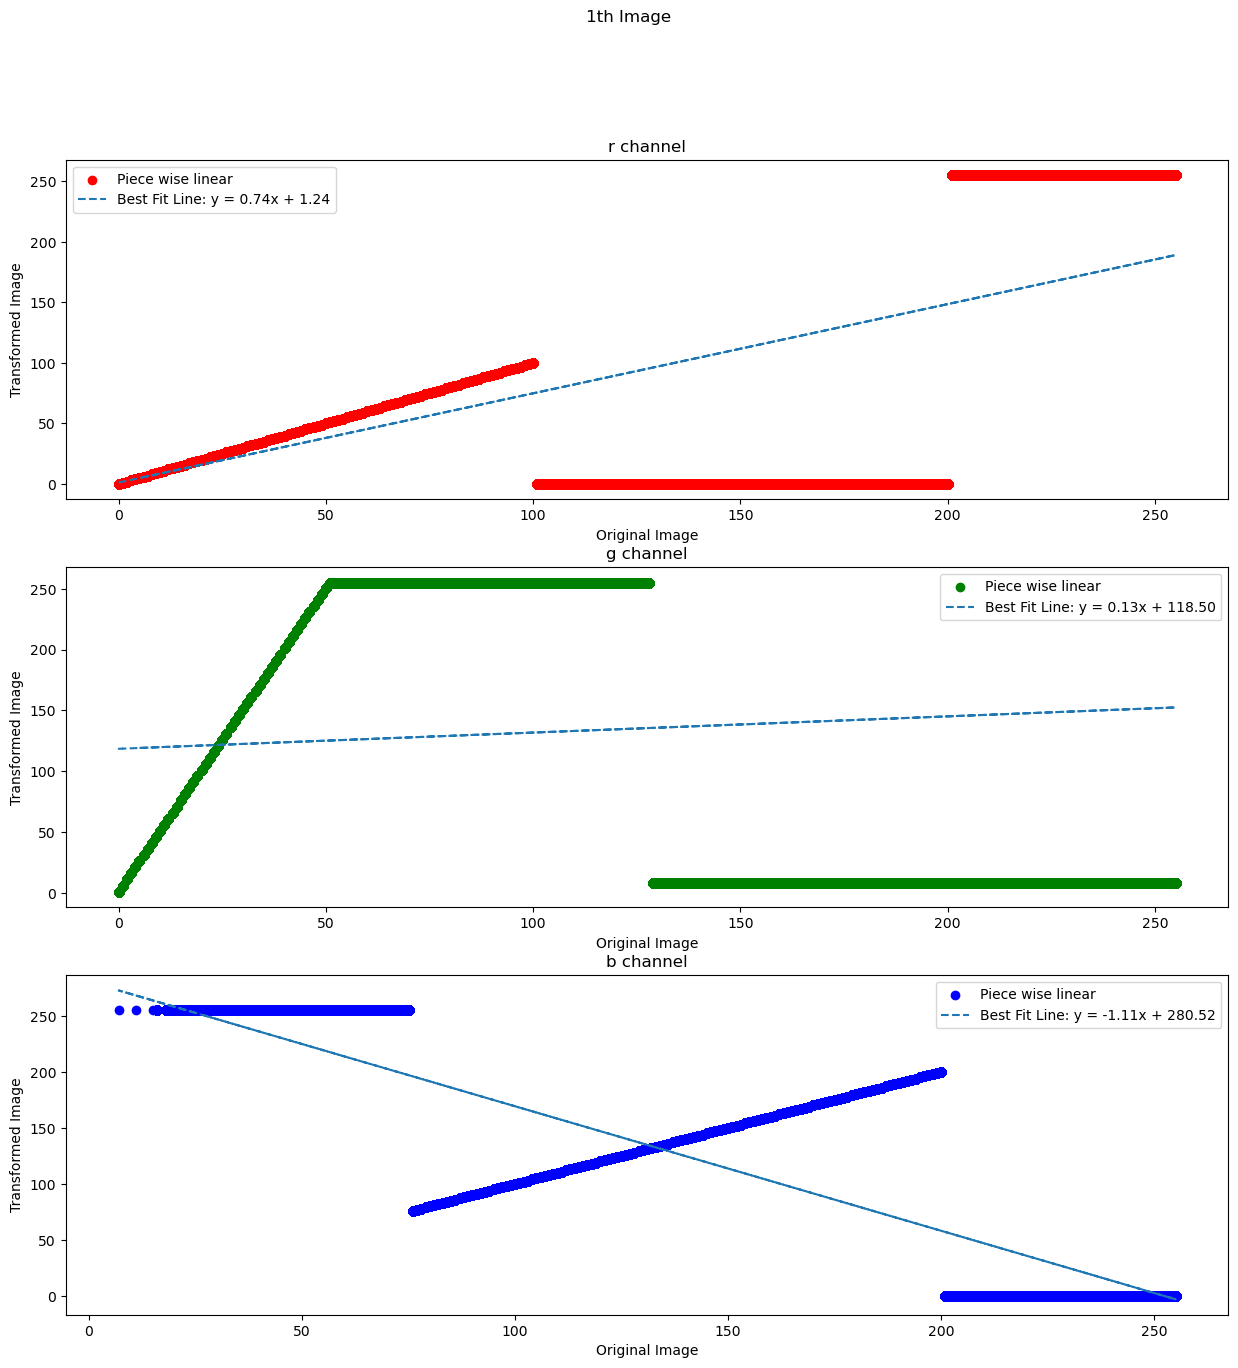

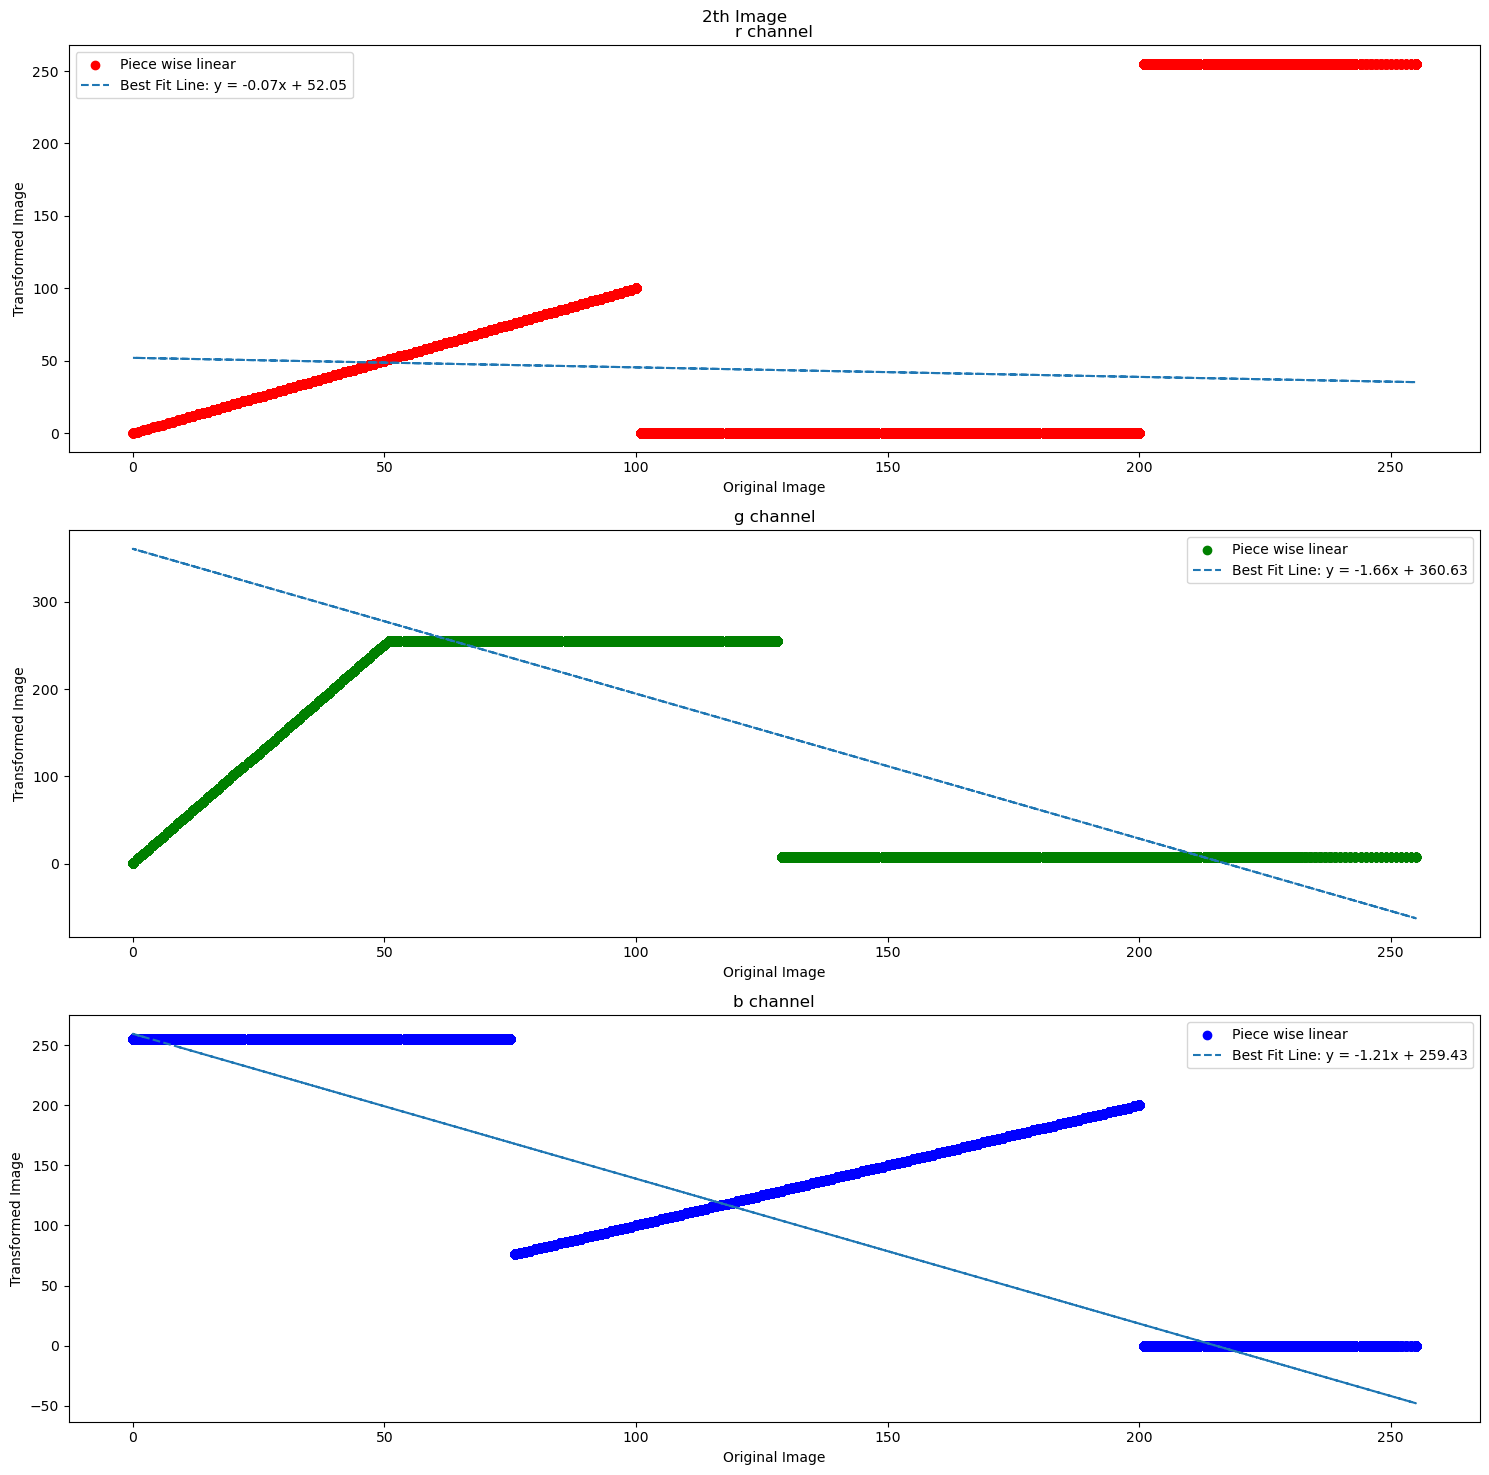

In [33]:
og_tf_images = [(A, transformed_A), (B, transformed_B)]
intensity_lines_of_best_fit = []
new_slope = []
new_intercepts = []

for j, (og, tf) in enumerate(og_tf_images):
    fig, axs = plt.subplots(3, 1, figsize=(15, 15))
    intensity_lines_of_best_fit.append([])
    new_intercepts.append([])
    new_slope.append([])
    
    for i in range(3):
        x_values = og[:, :, i].flatten()
        y_values = tf[:, :, i].flatten()

        x_mean = np.mean(x_values)
        y_mean = np.mean(y_values)

        numerator = np.sum((x_values - x_mean) * (y_values - y_mean))
        denominator = np.sum((x_values - x_mean) ** 2)

        slope = numerator / denominator
        inter = y_mean - slope * x_mean

        y_pred = slope * x_values + inter
        intensity_lines_of_best_fit[-1].append(y_pred)

        new_slope[-1].append(slope)
        new_intercepts[-1].append(inter)

        axs[i].scatter(x_values, y_values, color=f'{colours[i]}', label = 'Piece wise linear')
        axs[i].plot(x_values, y_pred, linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {inter:.2f}')
        axs[i].set_title(f'{colours[i]} channel')
        axs[i].set_xlabel('Original Image')
        axs[i].set_ylabel('Transformed Image')
        axs[i].legend()
    fig.suptitle(f'{j+1}th Image')
plt.tight_layout()
plt.show()

Here we observe the scatter plots to follow a similar patter to that of the piece wise linear function. Upon applying the linear function the input intensities get mapped to the corresponding output intensity which lie on the function. The line of best fit accurately matches the points of the image such that the square distance error is minimized.

4. Now let us plot the line of bestfits for the transform as well as the input output intensity plot together.

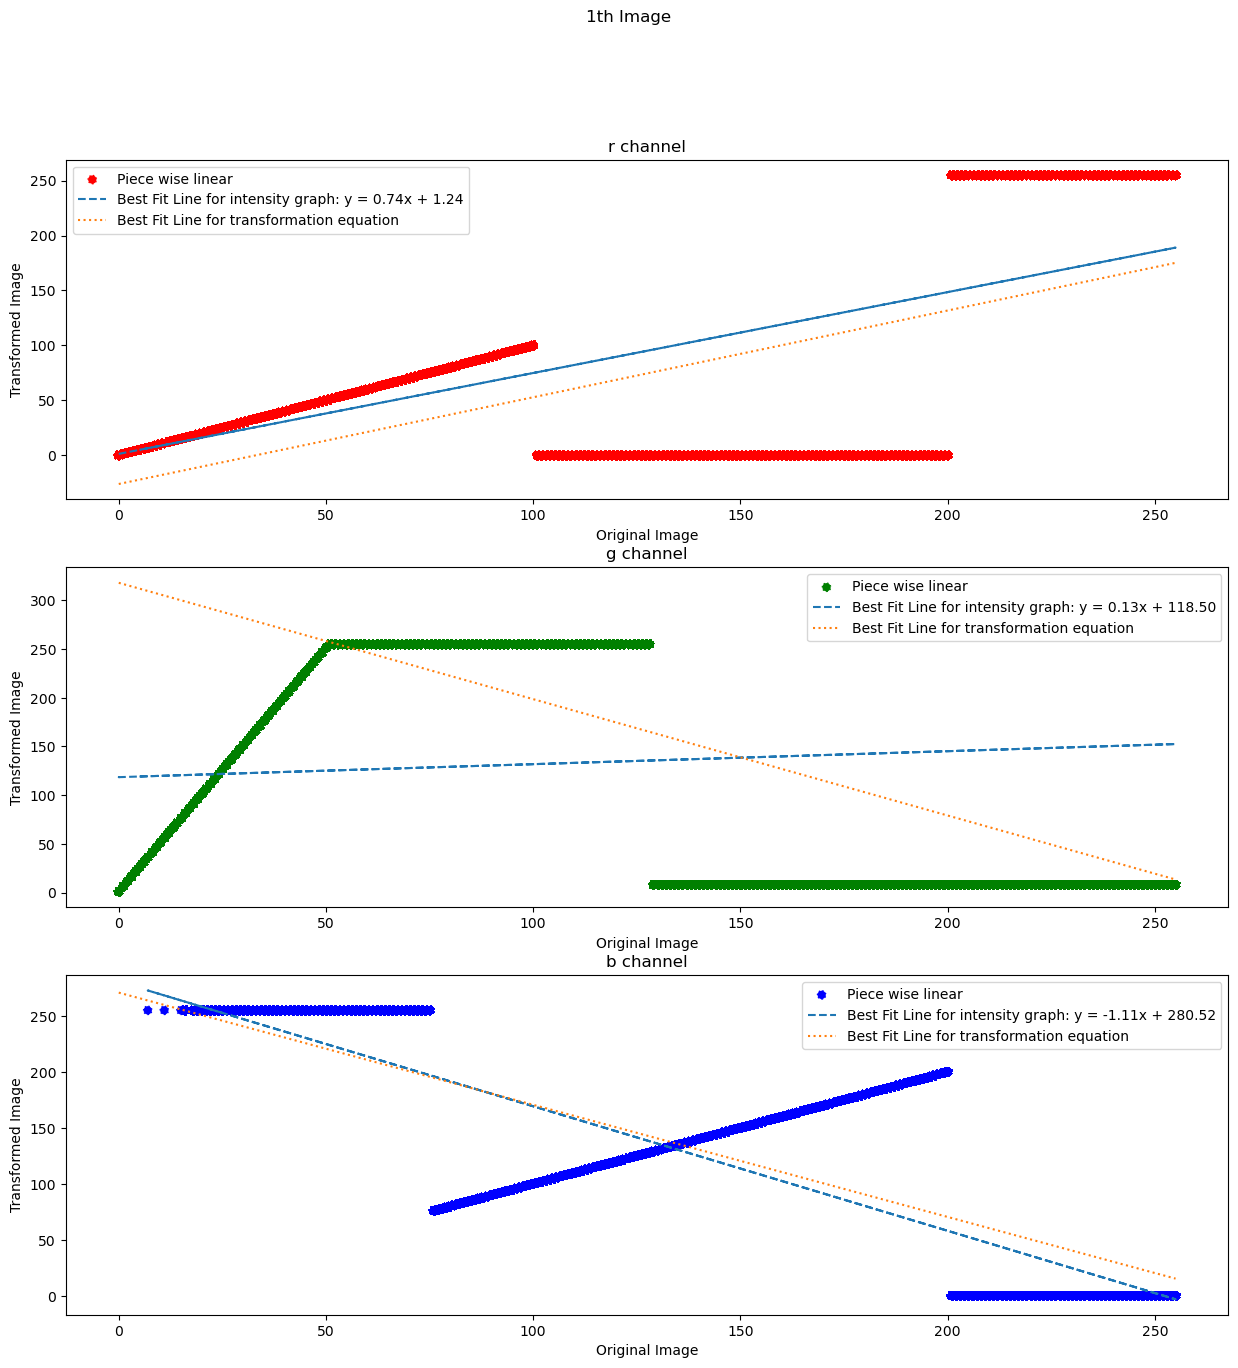

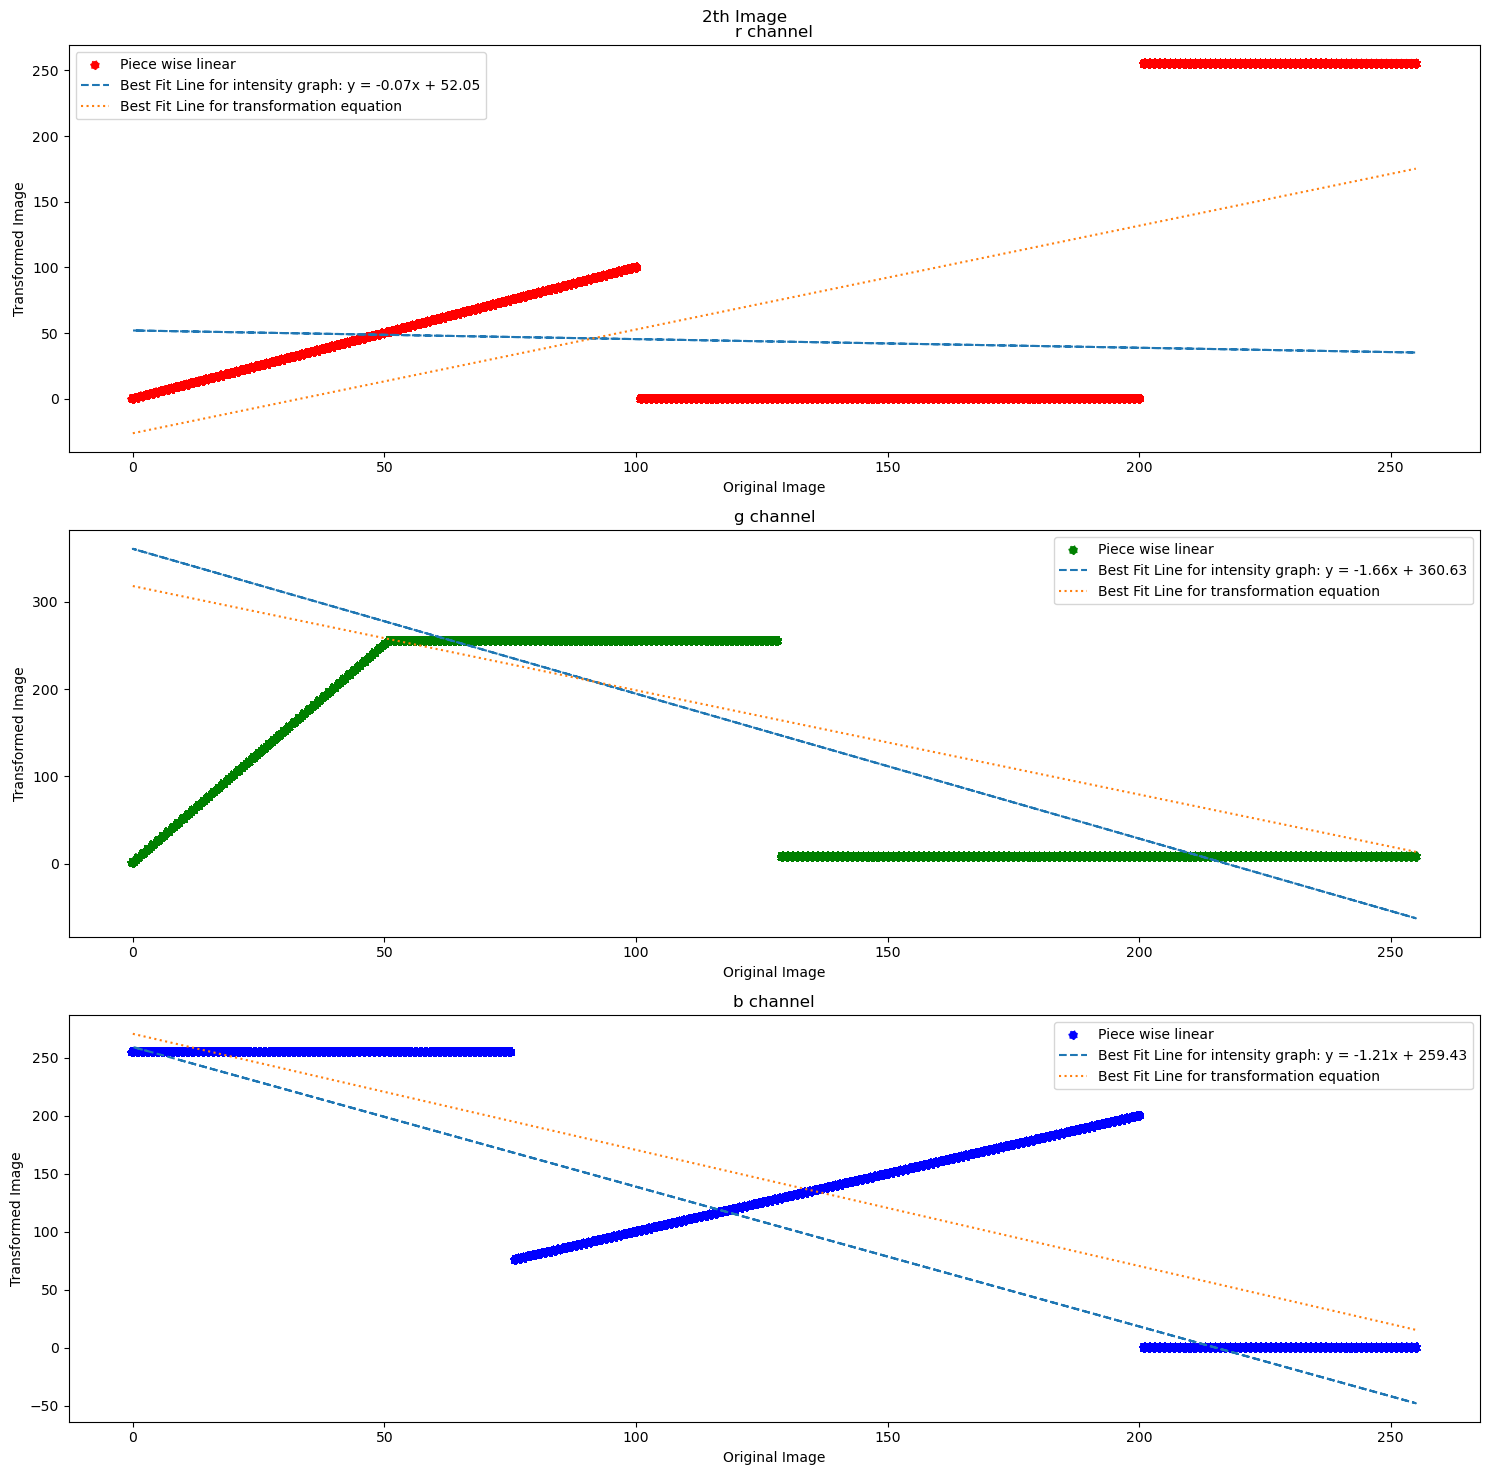

In [27]:
for j, (og, tf) in enumerate(og_tf_images):
    fig, axs = plt.subplots(3, 1, figsize=(15, 15))

    for i in range(3):
        x_values = og[:, :, i].flatten()
        y_values = tf[:, :, i].flatten()

        axs[i].scatter(x_values, y_values, linestyle='dotted', color=f'{colours[i]}', label = 'Piece wise linear')
        axs[i].plot(x_values, intensity_lines_of_best_fit[j][i], linestyle='--', label=f'Best Fit Line for intensity graph: y = {new_slope[j][i]:.2f}x + {new_intercepts[j][i]:.2f}')
        axs[i].plot(X_values, bestfit_lines[i], linestyle='dotted', label=f'Best Fit Line for transformation equation')
        axs[i].set_title(f'{colours[i]} channel')
        axs[i].set_xlabel('Original Image')
        axs[i].set_ylabel('Transformed Image')
        axs[i].legend()
    fig.suptitle(f'{j+1}th Image')

plt.tight_layout()
plt.show()

5. Let us use the line of best fits obtained from the intensity graphs and apply them to our original images.

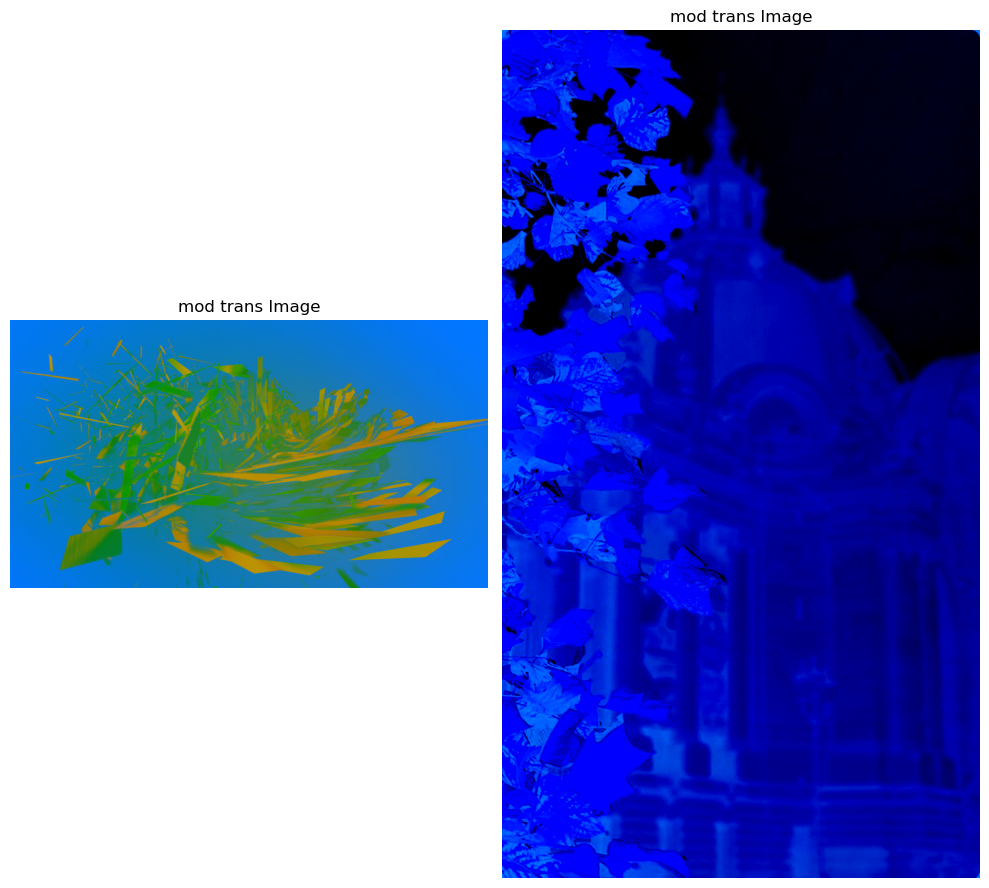

In [28]:
mod_trans_A = np.empty_like(A, dtype=np.int32)
mod_trans_B = np.empty_like(B, dtype=np.int32)

for i in range(3):
    mod_trans_A[:, :, i] = (new_slope[0][i]*A[:, :, i].astype(np.int32) + new_intercepts[0][i])
    mod_trans_A = np.clip(mod_trans_A, 0, 255)

for i in range(3):
    mod_trans_B[:, :, i] = (new_slope[1][i]*B[:, :, i].astype(np.int32) + new_intercepts[0][i])
    mod_trans_B = np.clip(mod_trans_B, 0, 255)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(mod_trans_A)
axs[0].set_title('mod trans Image')
axs[0].axis('off')

axs[1].imshow(mod_trans_B)
axs[1].set_title('mod trans Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

6. Now let us repeat subtask 3 but this time using mod trans and the transformation images.

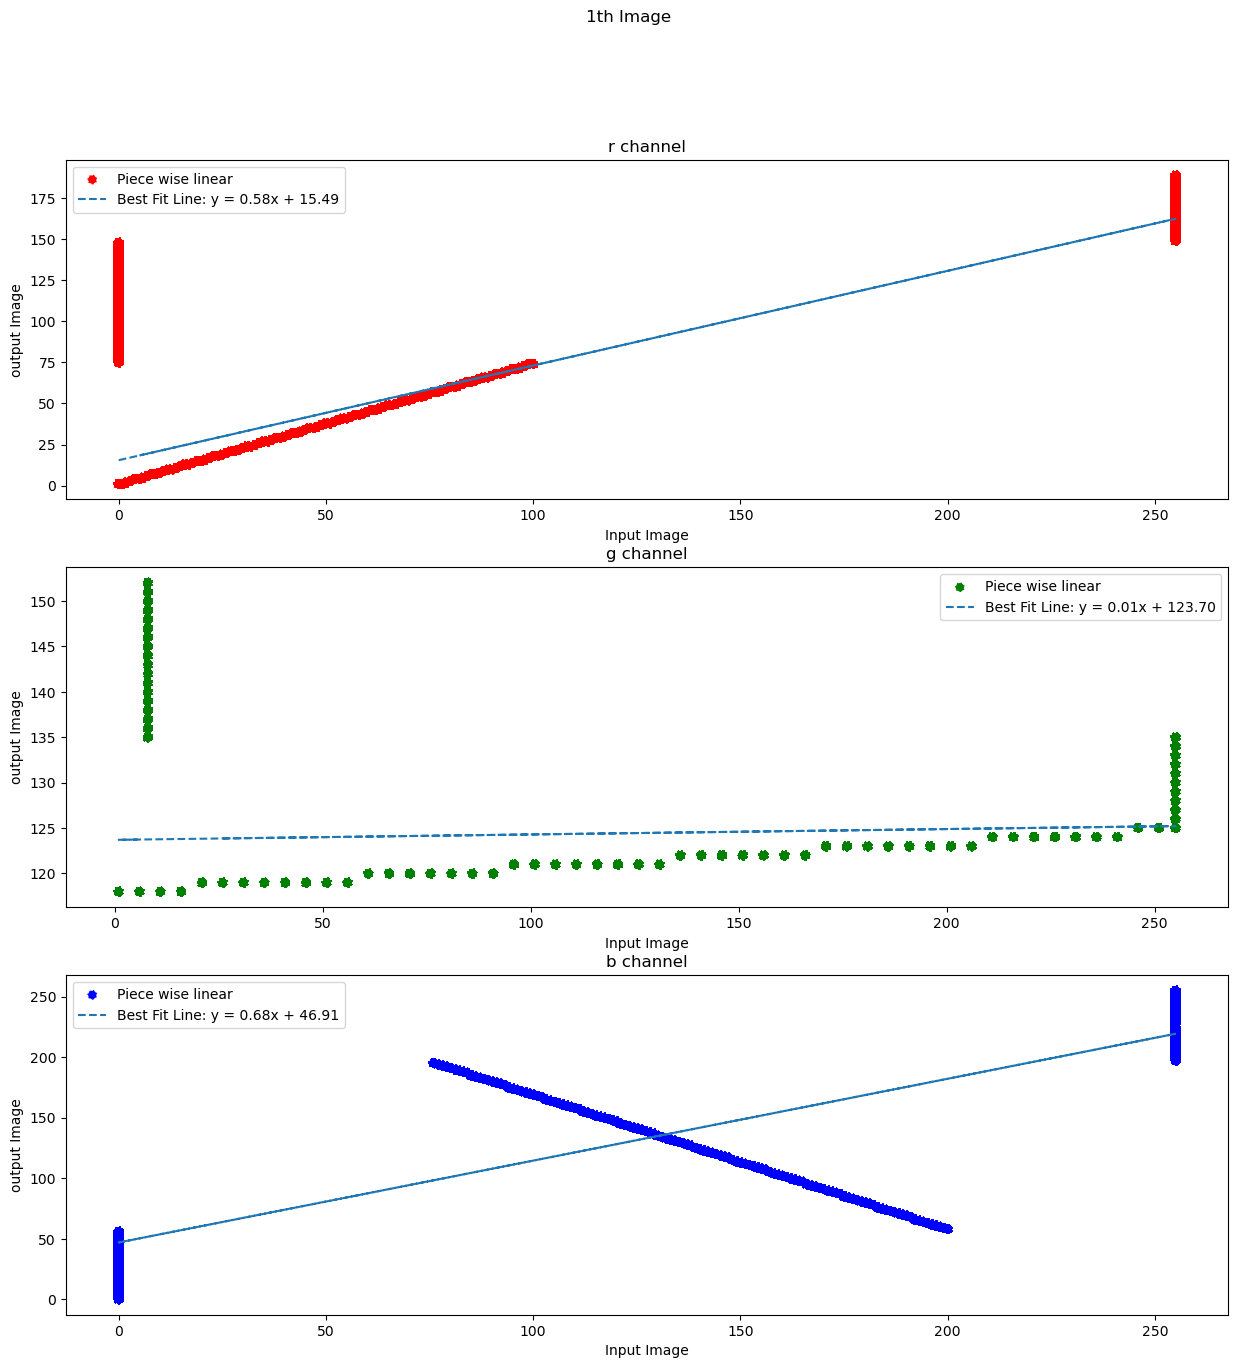

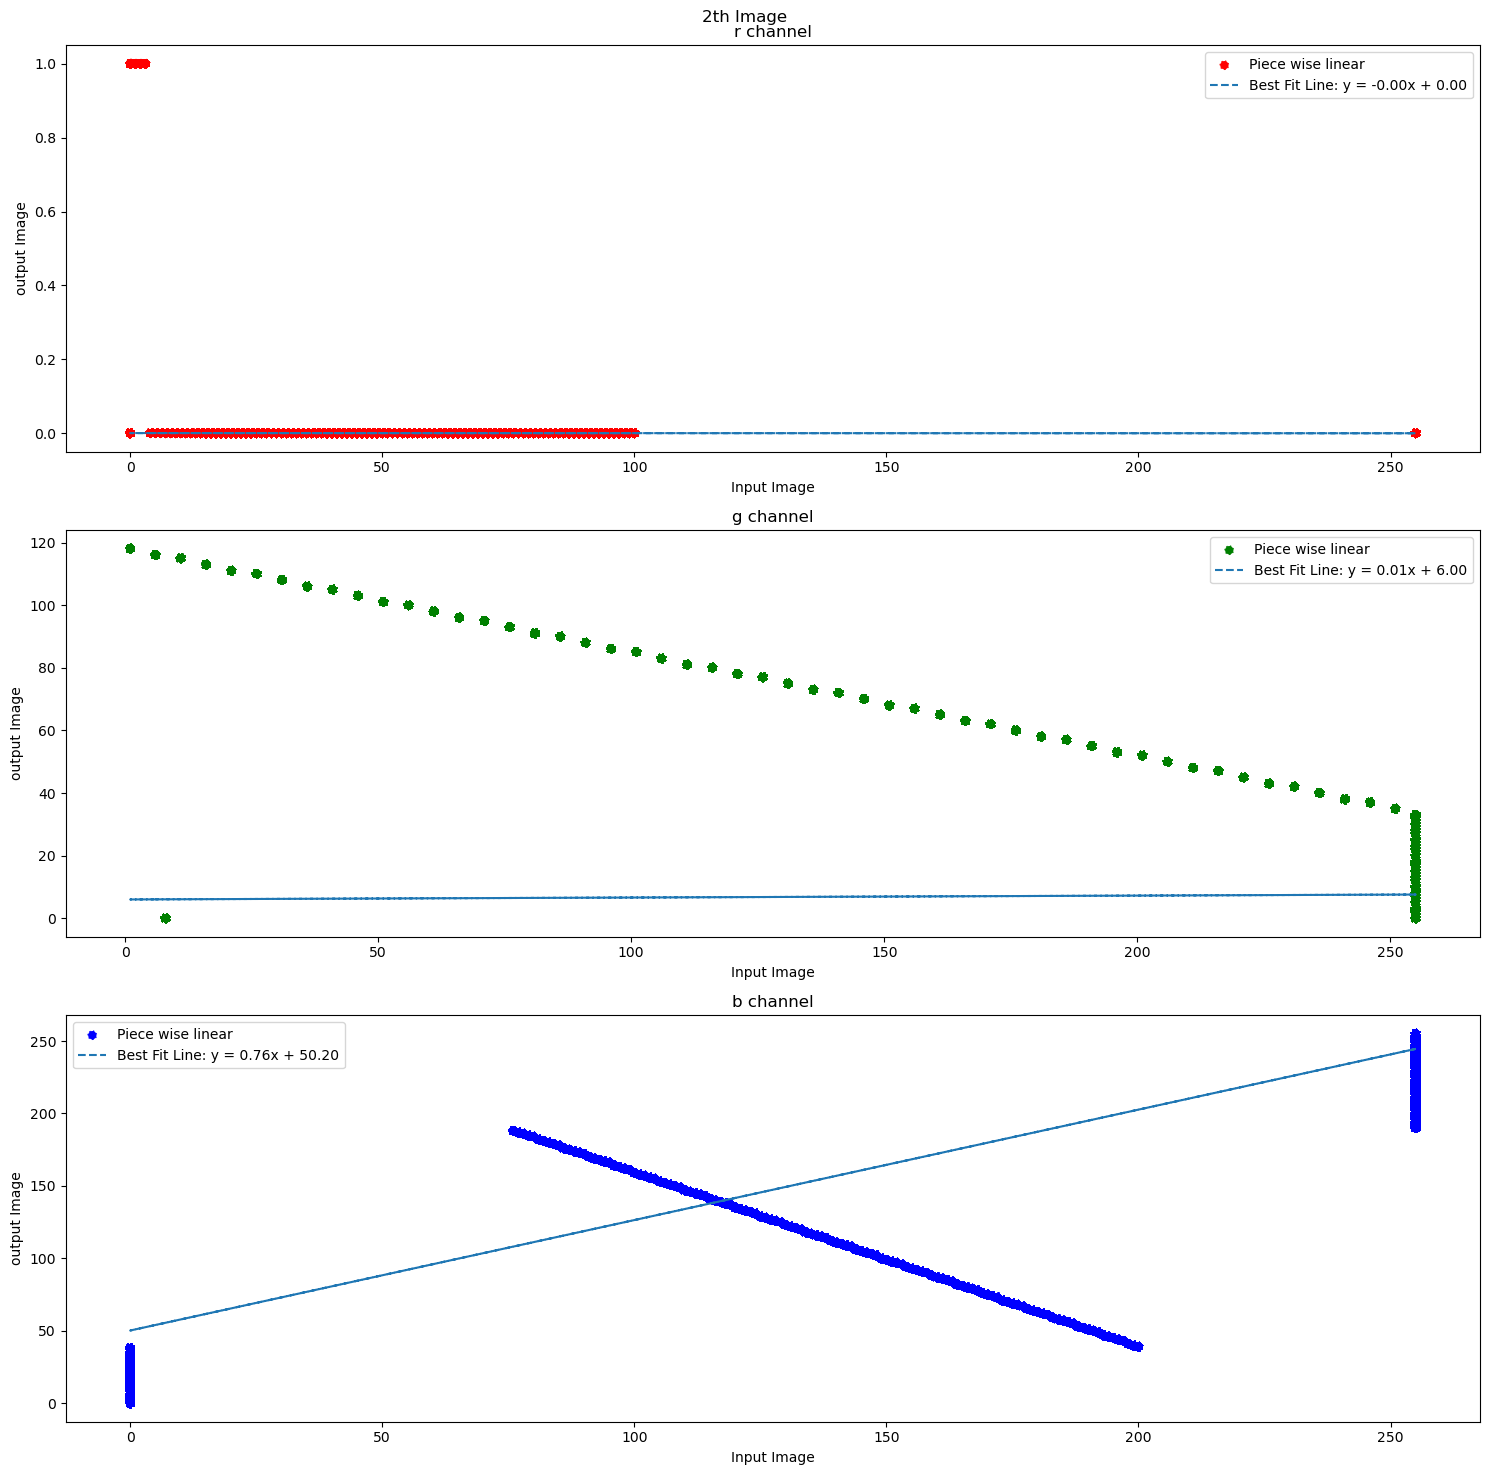

In [30]:
og_tf_images = [(transformed_A, mod_trans_A), (transformed_B, mod_trans_B)]

for j, (og, tf) in enumerate(og_tf_images):
    fig, axs = plt.subplots(3, 1, figsize=(15, 15))
    
    for i in range(3):
        x_values = og[:, :, i].flatten()
        y_values = tf[:, :, i].flatten()

        x_mean = np.mean(x_values)
        y_mean = np.mean(y_values)

        numerator = np.sum((x_values - x_mean) * (y_values - y_mean))
        denominator = np.sum((x_values - x_mean) ** 2)

        slope = numerator / denominator
        inter = y_mean - slope * x_mean

        y_pred = slope * x_values + inter

        axs[i].scatter(x_values, y_values, linestyle='dotted', color=f'{colours[i]}', label = 'Piece wise linear')
        axs[i].plot(x_values, y_pred, linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {inter:.2f}')
        axs[i].set_title(f'{colours[i]} channel')
        axs[i].set_xlabel('Input Image')
        axs[i].set_ylabel('output Image')
        axs[i].legend()
    fig.suptitle(f'{j+1}th Image')
plt.tight_layout()
plt.show()

7. When I look at the mod transformed image and the transformed image, I definitely see the image more clearer and the overall brightness of the gradients of the colours in the image have also gone down. So definitely the transform works as a filter. We can confirm this from the above plots as well, how the higher pixel intensities of the transformed image wither output to 0 or low intensity values in the mod transformed image, which essentially works as a filter. 